In [1]:
# Import Needed Packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read In Image
image = mpimg.imread('lane_lines.jpg')

print("This Image Is: ", type(image), "With Dimensions: ", image.shape)

# Grab X And Y Size, Copy Image
y_size = image.shape[0]
x_size = image.shape[1]

color_select = np.copy(image)
line_image = np.copy(image)

This Image Is:  <class 'numpy.ndarray'> With Dimensions:  (540, 960, 3)


In [3]:
# Define Color Selection Criteria
red_threshold = green_threshold = blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [4]:
# Define Triangular ROI
# (Note: (0,0) Is Upper-Left)
left_bottom = [120, 539]
right_bottom = [800, 539]
apex = [470, 300]

In [5]:
# Fit Lines y=Ax+B To Identify 3-Sided ROI
# np.polyfit() Returns Coefficients [A,B] Of Fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [6]:
# Identify Pixels Below Threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2])

In [7]:
# Find Region Inside Lines
XX, YY = np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [8]:
# Mask Color And Region Selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

# Color Pxs Red Where Both Color And Region Selections Meet
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

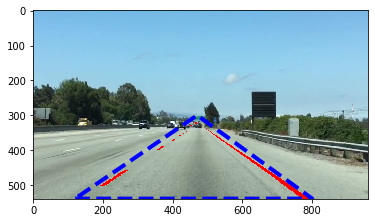

In [9]:
# Display Image, Show Region And Color Selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)